# Module 3 Visualising GeoSpatial Data

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

In [2]:
countries = geopandas.read_file("zip://data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://data/ne_50m_rivers_lake_centerlines.zip")

## Basic Plots

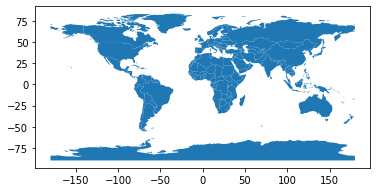

In [3]:
countries.plot()

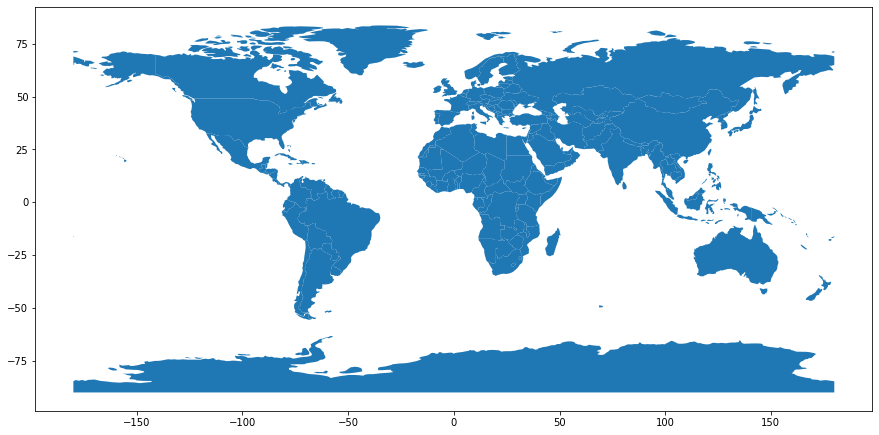

In [4]:
countries.plot(figsize=(15, 15))

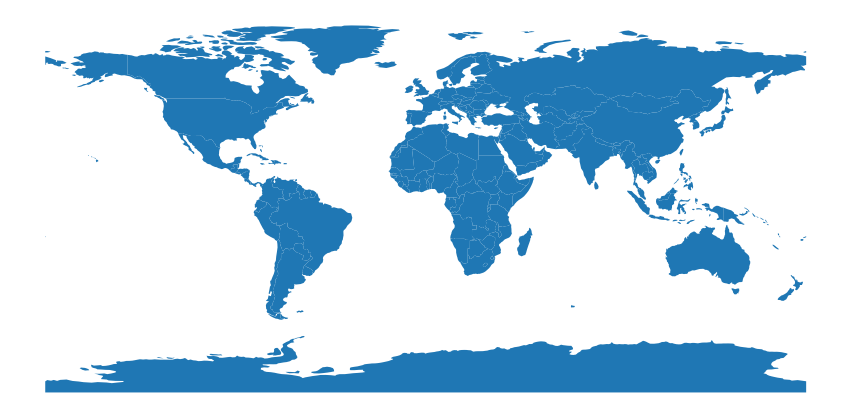

In [5]:
ax = countries.plot(figsize=(15, 15))
ax.set_axis_off()

## Coloring based on column values

In [6]:
countries = countries[(countries['pop_est'] >0 ) & (countries['name'] != "Antarctica")]
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [7]:
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry,gdp_per_cap
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",0.187781
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...",0.644825
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",1.112209
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",10.987283
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...",1.985402


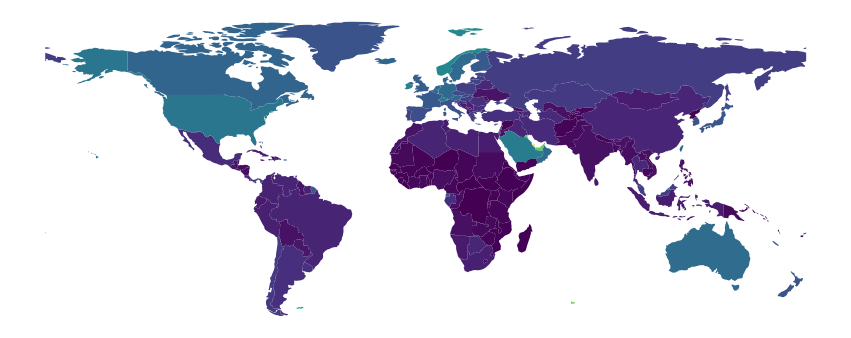

In [8]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap')
ax.set_axis_off()

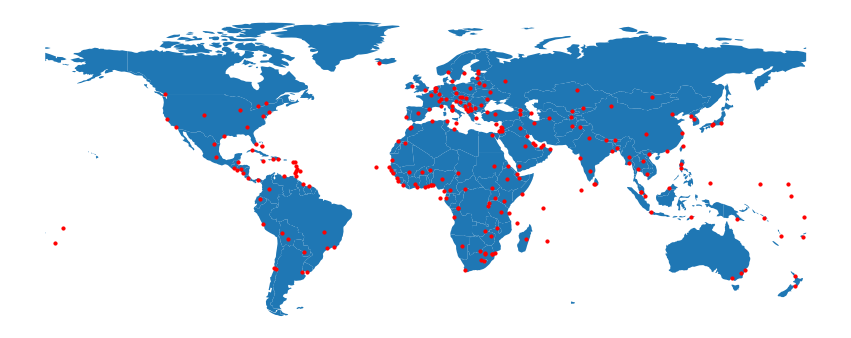

In [9]:
ax = countries.plot(figsize=(15, 15))
cities.plot(ax=ax, color='red', markersize=10)
ax.set_axis_off()

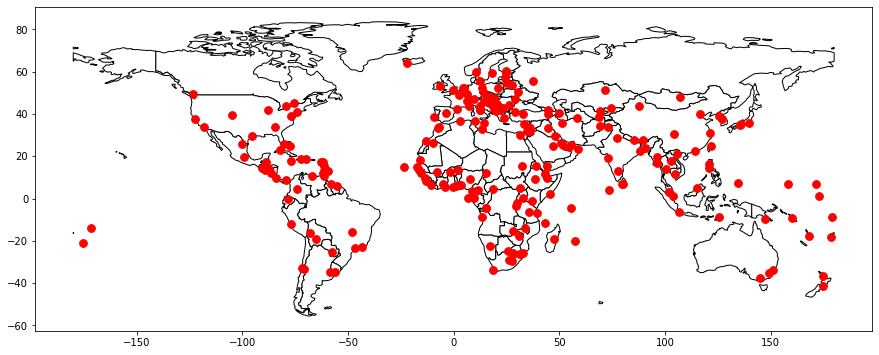

In [10]:
base = countries.plot(color='white', edgecolor='black', figsize=(15, 15))
cities.plot(ax=base, marker='o', color='red', markersize=60)
ax.set_axis_off()

## Ex: Combining Different Plots

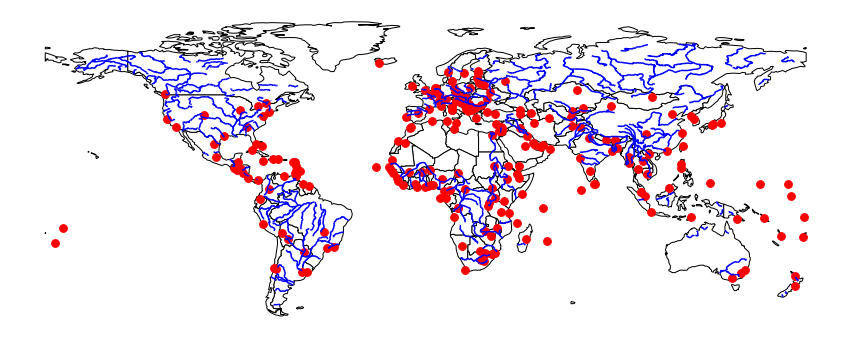

In [11]:
base = countries.plot(color='white', edgecolor='black', figsize=(15, 15))
cities.plot(ax=base, marker='o', color='red', markersize=60)
rivers.plot(ax=base, color='b')
base.set_axis_off()

## Choropleth Maps

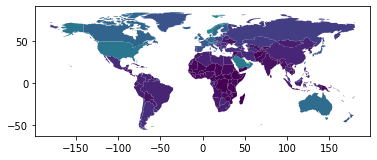

In [12]:
countries.plot(column='gdp_per_cap')

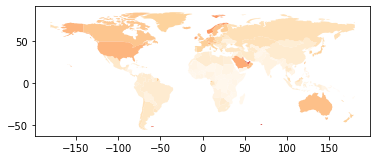

In [13]:
countries.plot(column='gdp_per_cap', cmap='OrRd');

## Bokeh

In [66]:
!pip install bokeh

In [47]:
import pandas as pd

mtcars = pd.read_csv('data/mtcars.csv',usecols=['car_names', 'mpg','hp','cyl','am'],index_col='car_names')
mtcars.head()

,mpg,cyl,hp,am
car_names,,,,
Mazda RX4,21.0,6,110,1
Mazda RX4 Wag,21.0,6,110,1
Datsun 710,22.8,4,93,1
Hornet 4 Drive,21.4,6,110,0
Hornet Sportabout,18.7,8,175,0


In [48]:
from bokeh.plotting import figure, output_file, show

In [49]:
output_file("circle.html")
p = figure(plot_width=400, plot_height=400)
p.circle(x=mtcars.mpg, y=mtcars.hp, size=20, color="navy", alpha=0.5)
show(p)

In [53]:
output_file("square.html")
p = figure(plot_width=400, plot_height=400)
p.square(x=mtcars.mpg, y=mtcars.hp, size=20, color="navy", alpha=0.5)
show(p)

In [54]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [57]:
output_notebook()

output_file("circle.html")
p = figure(plot_width=400, plot_height=400)
p.circle(x=mtcars.mpg, y=mtcars.hp, size=20, color="navy", alpha=0.5)
show(p)

Loading BokehJS ...

In [72]:
output_notebook()

output_file("square.html")
p = figure(plot_width=400, plot_height=400)
p.square(x=mtcars.mpg, y=mtcars.hp, size=20, color="navy", alpha=0.5)
show(p)

Loading BokehJS ...

In [75]:
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
map_options = GMapOptions(lat=1.3521, lng=103.8198, map_type="roadmap", zoom=11)
p = gmap("...", map_options)
show(p)

In [77]:
map_options = GMapOptions(lat=1.3521, lng=103.8198, map_type="roadmap", zoom=11)
p = gmap("...", map_options)

source = ColumnDataSource(
    data=dict(lat=[1.343465],
              lon=[103.776165])
)
p.circle(x="lon", y="lat", size=15, fill_color="blue", fill_alpha=0.8, source=source)

show(p)

## Geoplot

In [65]:
!pip install geoplot

     |████████████████████████████████| 14.4 MB 7.5 MB/s eta 0:00:01    |██████▎                         | 2.8 MB 4.4 MB/s eta 0:00:03
     |████████████████████████████████| 17.4 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 5.2 MB/s eta 0:00:01
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-macosx_10_13_x86_64.whl size=14401158 sha256=508b6bed481c4e4f670ec6f6666d70399758c07930d41b0cb8a33cdf0d07503a
  Stored in directory: /Users/anqitu/Library/Caches/pip/wheels/0b/a9/54/172056df34478378e0636d30cd4d1a868de00e37254649bf1a
  Created wheel for pyshp: filename=pyshp-2.1.0-py3-none-any.whl size=32608 sha256=a1357d97322941ba40c409e9ce2e8e5a33a95fcd391097c93ce2f5acf91e9918
  Stored in directory: /Users/anqitu/Library/Caches/pip/wheels/a0/c5/f3/548a073ac6a83d5b23d9b39cdd24314fc84bc8afc9882deb33
Successfully built cartopy pyshp


In [67]:
import geopandas

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')
injurious_collisions = geopandas.read_file(
    "https://github.com/ResidentMario/geoplot-data/raw/master/nyc-injurious-collisions.geojson")

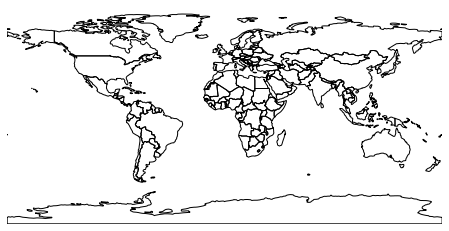

In [68]:
import geoplot
geoplot.polyplot(df, figsize=(8, 4))

/Users/anqitu/.pyenv/versions/3.7.0/lib/python3.7/site-packages/geoplot/geoplot.py:715: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  'Plot extent lies outside of the Orthographic projection\'s '
/Users/anqitu/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  after removing the cwd from sys.path.


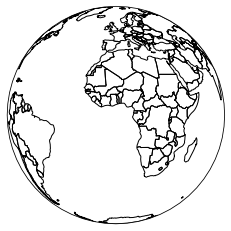

In [69]:
import geoplot.crs as gcrs
ax = geoplot.polyplot(df, projection=gcrs.Orthographic(), figsize=(8, 4))
ax.set_global()
ax.outline_patch.set_visible(True)

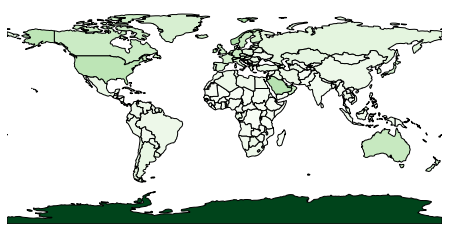

In [70]:
geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(8, 4))